# <CENTER><U>BLACK FRIDAY PREDICTION<CENTER><U>
    
### Problem Statement:
    
- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories.
- They have shared purchase summary of various customers for selected high volume products from last month.
- The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

• Data
• Variable Definition
• User_ID User ID
• Product_ID Product ID
• Gender Sex of User
• Age Age in bins
• Occupation Occupation (Masked)
• City_Category Category of the City (A,B,C)
• Stay_In_Current_City_Years Number of years stay in current city
• Marital_Status Marital Status
• Product_Category_1 Product Category (Masked)
• Product_Category_2 Product may belongs to other category also (Masked)
• Product_Category_3 Product may belongs to other category also (Masked)
• Purchase Purchase Amount (Target Variable)
    
**Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.** 
    
***

### Importing Necessary Libraries:

In [60]:
# Let's import all required Libraries:

import pandas as pd # to create Dataframe & for data wrangling purpose.
import numpy as np # Basic computation library

import warnings # Filtering warnings
warnings.filterwarnings("ignore") # to ignore any sort of warning 

import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline

### Importing dataset Train CSV file:

In [104]:
data = pd.read_csv('blackFriday_train.csv')
print('No. of Rows :',data.shape[0])
print('No. of Columns :', data.shape[1])
data.head()

No. of Rows : 550068
No. of Columns : 12


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


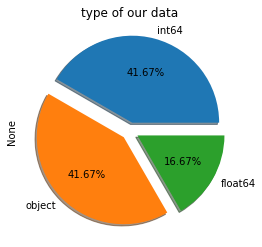

In [105]:
# Let us sort columns by their datatype:
data.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

##### <u>Dataset Information :<u>
- Dataset consist of two CSV files, one for training model & other for testing dataset.
- Training dataset contain **550068 Rows** & **12 Columns**.
- There can be some **missing values** that are present in the dataset. With which we'll have to deal.
- We can **drop 'User_ID','Product_ID'**, because we want to be able to predict the buying behavior of any customer, not just those who are already recorded in the dataset.

In [ ]:
# Dropping User_ID & Product_ID:
#cols = ['User_ID','Product_ID']
#data.drop(cols, inplace = True, axis =1)

### <u>Feature Description of Dataset  :<u>
---
- User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
- Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
- Gender: indicates the gender of the person making the transaction.
- Age: indicates the age group of the person making the transaction.
- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
- Marital_Status: is 0 if the user is not married and 1 otherwise.
- Product_Category_1 to _3: Category of the product.
- Purchase: Purchase amount.
 ***

### Data profiling:

In [106]:
# Print information about a DataFrame:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [107]:
# getting NaN Columns data:
null_feat = data[['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase' , 
                'Product_Category_2', 'Product_Category_3', 'Gender', 'Age', 
                'City_Category', 'Stay_In_Current_City_Years']]
miss_val = null_feat.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(null_feat))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =["No. of NaN's", "% NaN data"]))

                            No. of NaN's  % NaN data
Product_Category_3                383247   69.672659
Product_Category_2                173638   31.566643
Occupation                             0    0.000000
Marital_Status                         0    0.000000
Product_Category_1                     0    0.000000
Purchase                               0    0.000000
Gender                                 0    0.000000
Age                                    0    0.000000
City_Category                          0    0.000000
Stay_In_Current_City_Years             0    0.000000


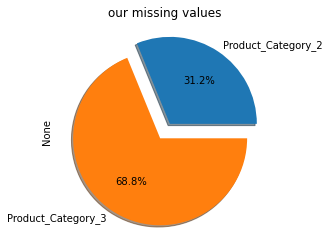

In [108]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

In [109]:
missing_values = data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


In [110]:
# let's sort columns by their datatype:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase'], float64: ['Product_Category_2', 'Product_Category_3'], object: ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']}

In [111]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [112]:
# description of each of the attributes of the dataset.
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


###### Observations:

- Dataset contains both **Object & Numerical data types**.
- Dataset contains **numerical as well as categorical variables**. 
- It would make sense to look at the summary statistics of the purchase variable. We see that the average purchase amount is 9263.97. The remainder of the variables don't make much sense to check summary statistics, as they are categories. Nevertheless, we have included them but won't examine them for insight. 
- The dataset contains **many null values** in Product_Category_3 & Product_Category_2 coumns.
- ***It makes sense for there to be missing values because some customers might only buy one category of product and not buy from the other 2 product categories. We should fill the missing value with a 0 to show this.*** 

In [113]:
# Missing Values Imputation:
# Most features are categorical. We will fill the NaNs with 0's for Product Category_2 and 3

data["Product_Category_2"] = data["Product_Category_2"].fillna(0)
data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

### Data Integrity Check

- Dataset may contain whitespaces, missing value etc. let's investigate the integrity of data before proceeding for further analysis.

In [114]:
# Checking for the presense of whitespaces, '-', 'null', 'NA':
data.isin(['-999',' ','?','-',' ?','null','NA','N/A','nan','Nan','NAN','NaN']).sum().any()

False

In [115]:
data.isnull().sum().any()

False

In [116]:
data.duplicated().sum() # Checking for duplicacy.

0

In [117]:
# Droping duplicate entries
#data.drop_duplicates(keep='last', inplace =True)
#data.shape

> # Exploratory Data Analysis (EDA)

In [118]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


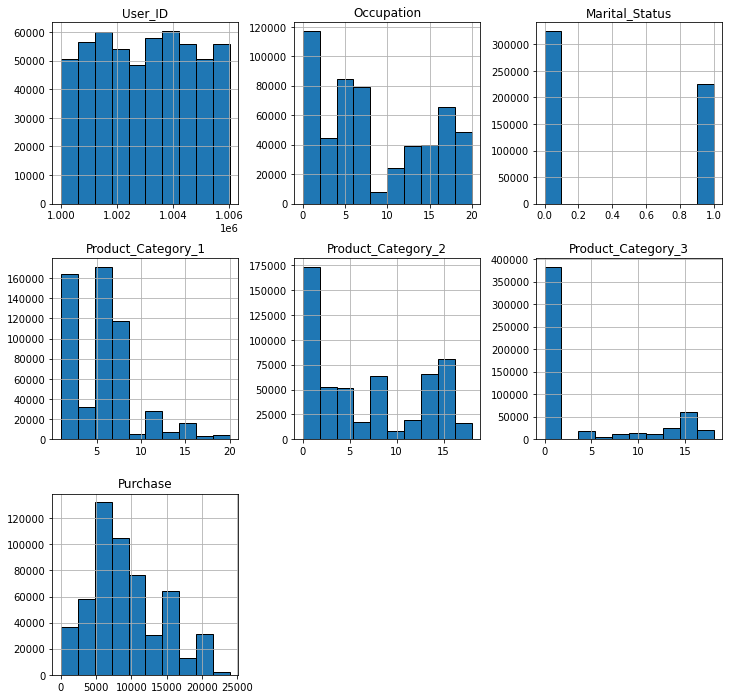

In [119]:
data.hist(edgecolor='black',figsize=(12,12));

Text(0, 0.5, 'Count')

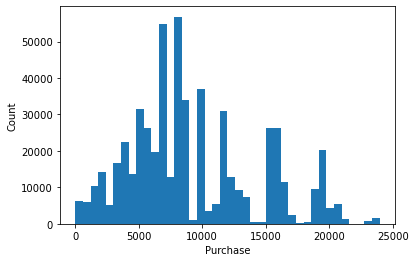

In [120]:
plt.hist(data['Purchase'], bins = 40)
plt.xlabel('Purchase')
plt.ylabel('Count')

If we predict purchase amount, this would be our y variable. It seems like it is right skewed but more or less normal. 

We next want to know the number of unique values in the columns to check if there are recurring customers and to see the variety in products offered. 

In [121]:
for col in data.columns:
    print(col, ': \n', data[col].nunique())

User_ID : 
 5891
Product_ID : 
 3631
Gender : 
 2
Age : 
 7
Occupation : 
 21
City_Category : 
 3
Stay_In_Current_City_Years : 
 5
Marital_Status : 
 2
Product_Category_1 : 
 20
Product_Category_2 : 
 18
Product_Category_3 : 
 16
Purchase : 
 18105


**Some interesting findings:**
- We notice that there are repeating customers since unique user ID is much less than the amount of observations we have
- There are 2 less product varieties in Product Category 3 which can perhaps slightly influence insights. It could be that since there is fewer variety, consumers have less choice which could prompt customers to buy less. 


We can use these features to find interesting patterns in shopping habits

**Goals:**
- Predict purchase amount based on all features 
- Give recommendations based on age, location  

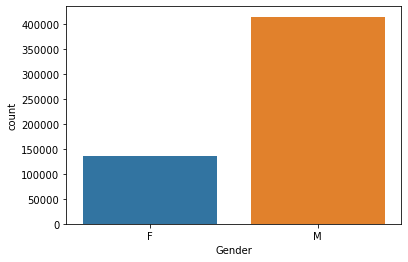

In [122]:
# Let's see ratio of women to men 
sns.countplot(data['Gender'])
plt.show()

We notice there are more male customers than there are female customers, including recurring customers. 

Let's now check to see the female to male ratio against Purchase.

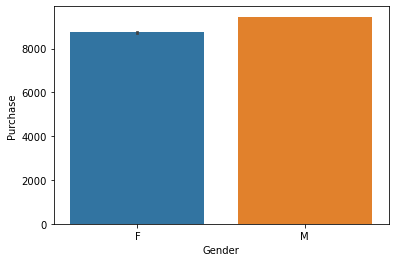

In [123]:
#gender_purchase = data[['Gender', 'Purchase']].groupby(['Gender']).mean()
#gender_purchase.plot.bar()
sns.barplot('Gender', 'Purchase', data = data)
plt.show()

- Male customers tend to have purchased more than female customers. 
- There may be different reasons for this. 
- First, we saw that the ratio of males to females is more which would mean more purcahses. 
- It could also be that married couples shop together and it is the husband that tends to purchase the products for his wife. 
- Therefore, the reflection of more male purchasers doesn't necessarily reflect for whom the products are being purchased for. 
- Also, there may be more male customers because the products target males more. 
- It is interesting to see that although there are fewer female customers by count, the purchase amount is much more similar to the male's. 
- This could mean that the products the females purchase are more expensive. 

This leads us to investigate the case further and look into the amount of married couples who make a purchase and compare it to the single shoppers to see if there may be a difference in the habits of the gender of the purchaser. 

In [124]:
gender_marriage = data.groupby(['Gender','Marital_Status']).size().reset_index(name="Total")
gender_marriage.head()

,Gender,Marital_Status,Total
0,F,0,78821
1,F,1,56988
2,M,0,245910
3,M,1,168349


<AxesSubplot:xlabel='Gender'>

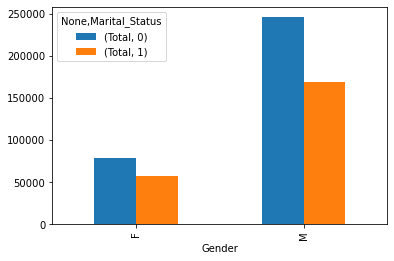

In [125]:
gender_marriage.set_index(['Gender','Marital_Status']).unstack().plot(kind='bar', stacked=False)

We notice that there are more single shoppers than there are married shoppers across gender. This does not support our previous belief that a reason for more male purchasers is attributable to the fact that more couples go shopping togther and the husband purchases the products. We clearly see that single shoppers are more prevalent across both groups. 

Gender has potential to be a decent predictor for purchase. 

Next, we would like to explore the age category. While exploring, we should consider:
- if age has potential to be a good predictor for purchase 
- check differences in gender across age groups 
- check to see if there is much variation in the different age groups for purchases 

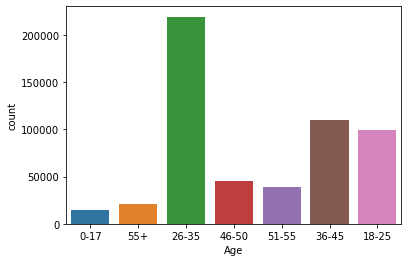

In [126]:
sns.countplot(data['Age'])
plt.show()

From the bar plot above, we see that there are much more shoppers between the ages of 26-35 years than any of the other age groups. We understand from this that the product offerings are catered more towards this age group and one age group above (36-45) and one age group below (18-25) mainly. Since most shoppers are from these age groups, it would make sense for the business to continue stocking their inventory with more of these popular products to cater to these age groups. Knowing this, the business can focus on marketing for these specific age groups and spend the most on them since it is their largest customer composition. Furthermore, it can consider adding more variety in products if it wants to cater to all age groups and potentially increase sales.   

Next, let's check the gender decomposition across the popular age groups to see if males are consistently more across the 3 popular age groups. 

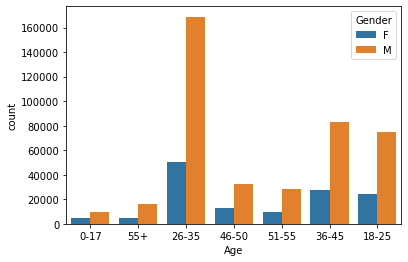

In [127]:
sns.countplot(data['Age'], hue = data['Gender'])
plt.show()

We verify that there are more male shoppers. The difference is especially noticable in the age group of 26-35. Males between ages of 26-35 constitute the largest portion of clients. This can help the business better allocate its energy and money towards targeting males between these age groups and increasing inventory count of these products or increase product offering similar to the ones already selling. Knowing this age group uses social media, the business can also use social media as another way of reaching and attracting customers. 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

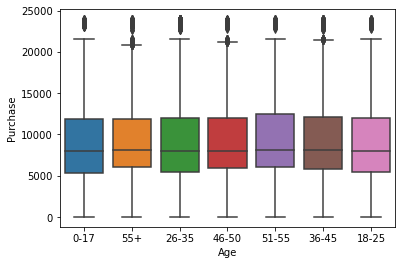

In [128]:
sns.boxplot('Age', 'Purchase', data = data)

It is interesting to see that from the boxplot above there doesn't seem to be much variation in purchase amount across the different age groups. Maybe the less popular clients that fall outside the popular age groups stated earlier purchase more expensive products while the popular clients purchase the less expensive items which would balance and create small variation across age groups.  

Check to see if there is variation in occupation across cities 

In [129]:
city_categs = ['A', 'B', 'C']

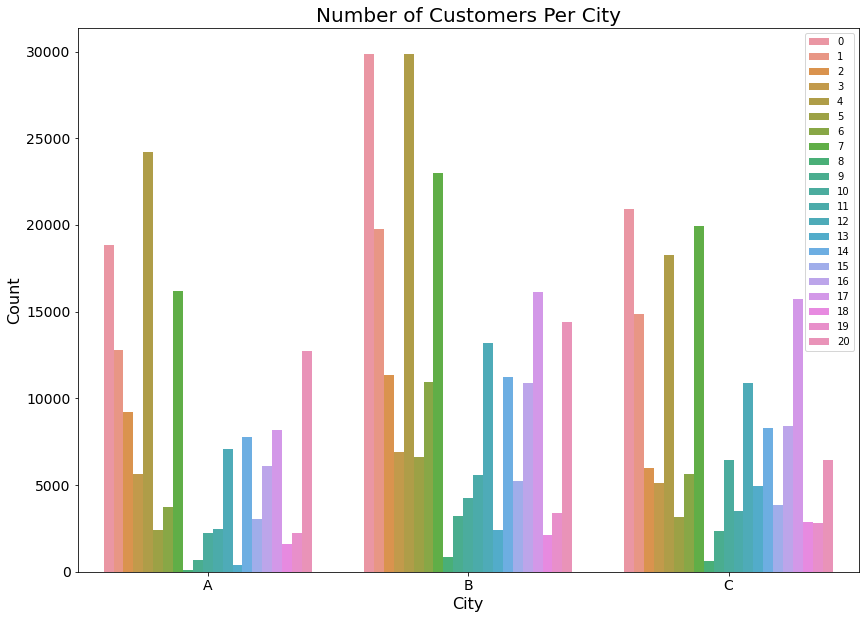

In [130]:
fig1, ax1 = plt.subplots(figsize=(14,10))
sns.countplot(data['City_Category'], order = city_categs, hue = data['Occupation'])
plt.title('Number of Customers Per City', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.legend(loc = 'upper right')
plt.tick_params(labelsize=14)
plt.show()


We see that in each of the cities, there seems to be a similar occupation distribution. Occuption 0, 4, 7 seem to be popular occupations among the customers across the three different cities. There doesn't seem to be much fluctuation across cities. There is more variation in occupation rather than across cities. Therefore, occupation seems to be a better indicator of likelihood of being a customer rather than the city defining it. 

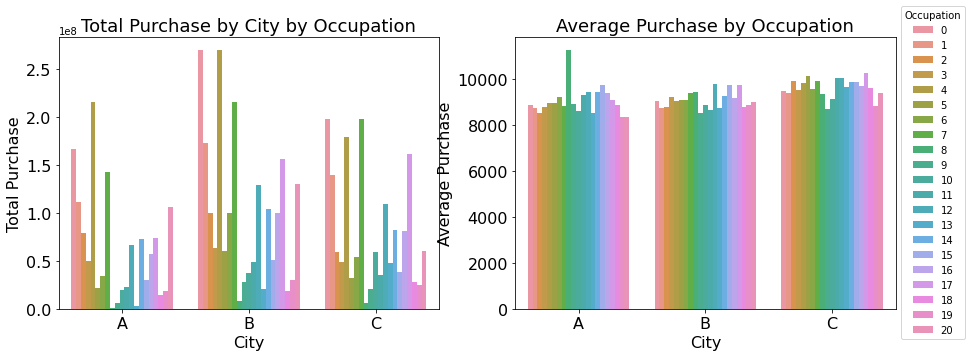

In [131]:
plt.figure(figsize=(15,5))
plt.subplot(121)
tot_purchases_city = data.groupby(['City_Category', 'Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Occupation', data = tot_purchases_city)
plt.title('Total Purchase by City by Occupation',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Total Purchase', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend().set_visible(False)

plt.subplot(122)
avg_purchases_city = data.groupby(['City_Category', 'Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Occupation', data = avg_purchases_city)
plt.title('Average Purchase by Occupation',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Average Purchase', fontsize = 16)
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=16)

From the previous plot, we notice the same distribution and see how total number of customers reflects total purchases so they are positively correlated. From the plot on the right of the average purchase by occupation, we can see how occupation 8 from city A stands out from the rest. It is interesting that the average purchase was higher for Occupation 8 only in City A. This seems to be an outlier in the data. 

Similarly, we next would like to see the variation in age groups across the different cities. 

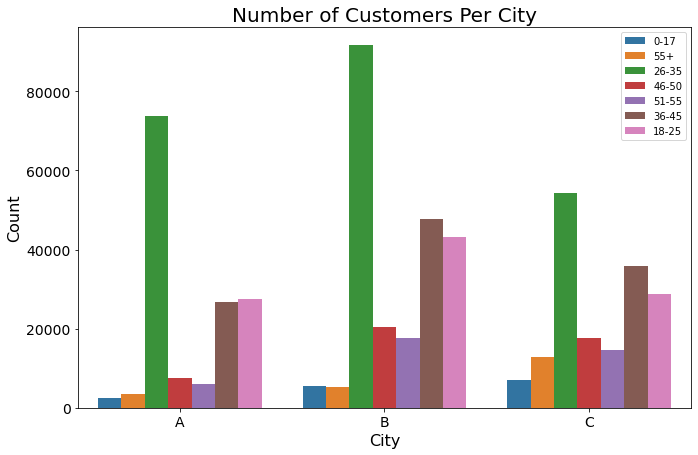

In [132]:
fig1, ax1 = plt.subplots(figsize=(11,7))
sns.countplot(data['City_Category'], order = city_categs, hue = data['Age'])
plt.title('Number of Customers Per City', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.legend(loc = 'upper right')
plt.tick_params(labelsize=14)
plt.show()

We see a similar distribution of the different age groups across the 3 cities. The most popular age group of 26-35 is mostly from City B. It seems that the most purchases come from City B so the business can target this city more by increasing its advertising to City B. 

We next would like to see how the relation between residency years and total purchase. 

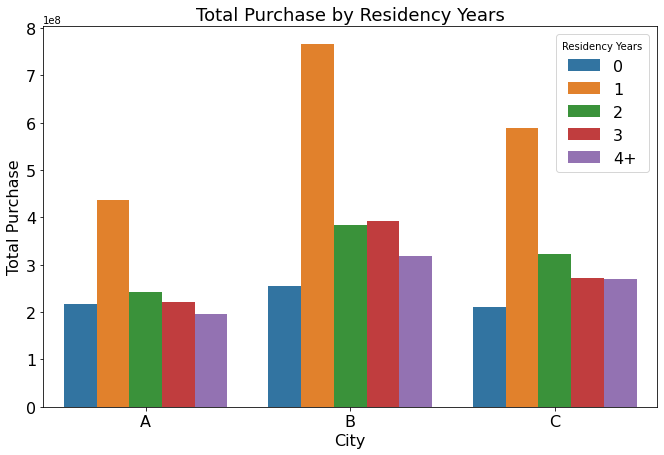

In [133]:
plt.figure(figsize=(11,7))
tot_purchases_yrs = data.groupby(['City_Category', 'Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Stay_In_Current_City_Years', data = tot_purchases_yrs)
plt.title('Total Purchase by Residency Years',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Total Purchase', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend(title = 'Residency Years', fontsize = 16)

We once again see a similar residency duration distribution across the 3 cities. It seems to be that customers who have been a resident for 1 year have contributed to total purchases. This is apparent across all 3 cities in orange. New residents are probably not as acquainted with the city and business and have the lowest contribution to total purchases. 

We now want to analyze purchases of products in category 1. 

In [134]:
cols = ['User_ID', 'Product_ID', 'Product_Category_1', 'Purchase']
a = data[cols]
a.head()

,User_ID,Product_ID,Product_Category_1,Purchase
0,1000001,P00069042,3,8370
1,1000001,P00248942,1,15200
2,1000001,P00087842,12,1422
3,1000001,P00085442,12,1057
4,1000002,P00285442,8,7969


In [135]:
userid_count = pd.DataFrame(a.groupby('User_ID')['Product_ID', 'Product_Category_1'].nunique())
userid_count.head(10)

userid_count = userid_count.sort_values('Product_ID', ascending = False)
userid_count.head(10)

p_amt_per_user = pd.DataFrame(a.groupby('User_ID')['Purchase'].sum())
p_amt_per_user = p_amt_per_user.sort_values('Purchase', ascending = False)
p_amt_per_user.head(10)

newdf = pd.merge(p_amt_per_user, userid_count, left_index = True, right_index = True)
newdf.head(10)
                

,Purchase,Product_ID,Product_Category_1
User_ID,,,
1004277,10536909,979,19
1001680,8699596,1026,18
1002909,7577756,718,19
1001941,6817493,898,16
1000424,6573609,694,17
1004448,6566245,575,16
1005831,6512433,727,17
1001015,6511314,740,19
1003391,6477160,698,17


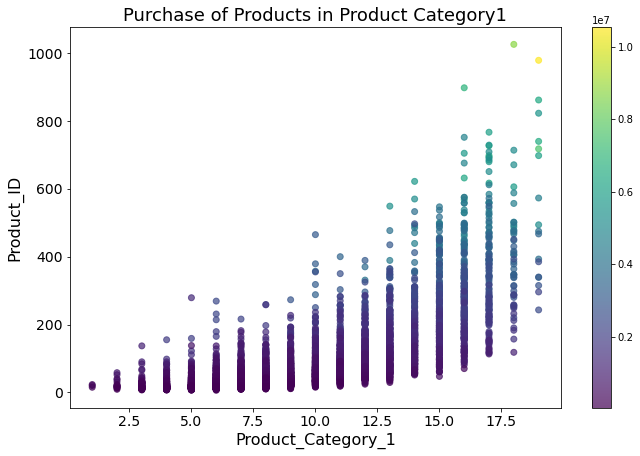

In [136]:
fig, ax = plt.subplots(1, figsize = (11,7)) 
p = plt.scatter('Product_Category_1', 'Product_ID', data = newdf, c = 'Purchase',alpha = 0.7)
plt.xlabel('Product_Category_1', fontsize = 16)
plt.ylabel('Product_ID', fontsize = 16)
plt.title('Purchase of Products in Product Category1', fontsize = 18)
plt.tick_params(labelsize=14)
fig.colorbar(p)

Product ID 1000 from from Product Category 1  seems to be the highest purchase amount. 

Lastly, we run a correlation plot to see the relationships among our variables. 

<AxesSubplot:>

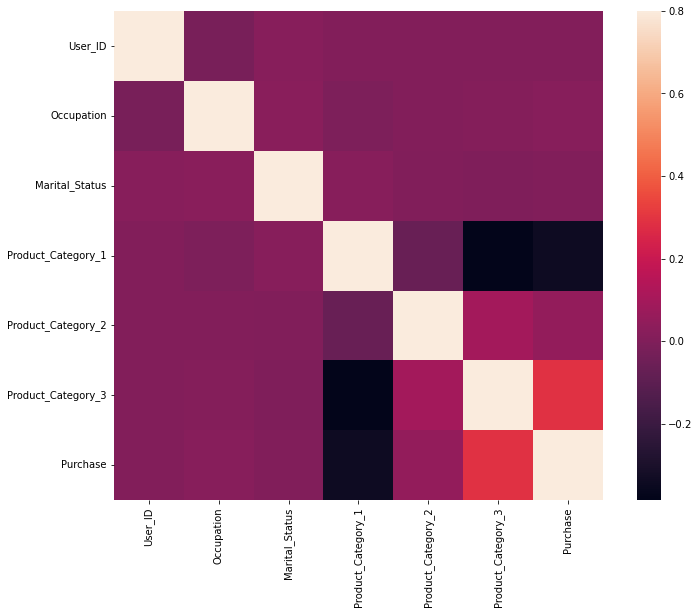

In [137]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Variables correlated with Purchase:
- Product_Category_3 (positive correlation) 
- Product_Category_1 (negative correlation)

Perhaps product_category 3 is positively correlated because it offered cheaper products. 
So let's see if this is true by checking the average price of the product categories.


In [138]:
mean1 = data['Product_Category_1'].mean()
mean2 = data['Product_Category_2'].mean()
mean3 = data['Product_Category_3'].mean()
print(f" Avg1: {mean1} \n Avg2: {mean2} \n Avg3: {mean3}")

 Avg1: 5.404270017525106 
 Avg2: 6.735436346051761 
 Avg3: 3.841941359977312


The average price in product 3 is cheaper than the others categories as hypothesized. This would help explain the behavior of customers to buy more of these products from this category since it is more affordable. 